In [1]:
# %load basic.py
from IPython.display import set_matplotlib_formats, display
import numpy as np
import pandas as pd
import mglearn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
from cycler import cycler

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/H2GTRM.TTF").get_name()
rc('font', family = font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))


np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

__all__ = ['np', 'mglearn', 'display', 'plt', 'pd']

# 3.3 데이터 전처리와 스케일 조정

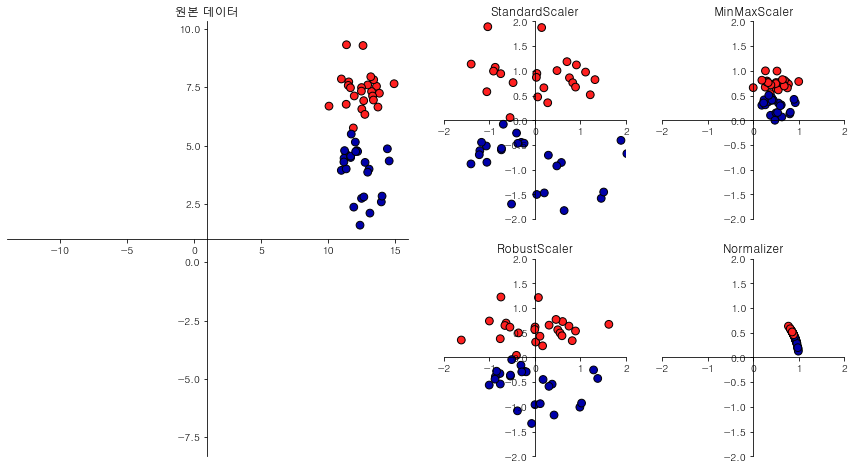

In [2]:
mglearn.plots.plot_scaling()

1. 왼쪽 그래프는 두 개의 특성을 인위적으로 만든 이진 분류 데이터셋  
    - 첫 번째 특성(x축의 값) : 10과 15 사이  
    - 두 번째 특성(y축의 값) : 1과 9 사이  
2. 오른쪽 그래프 4개는 데이터를 기준이 되는 범위로 변환하는 방법
    - StandardScaler는 각 특성의 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 가지게 합니다.  
    - RobustScaler는 특성들이 같은 스케일을 갖게 된다는 통계적 측면에서는 StandardScaler와 비슷하지만  
      평균과 분산 대신 **중간 값과 사분위 값**을 사용합니다.  
      (이상치에 영향을 받지 않음)
    - MinMaxScaler는 모든 특성이 정확하게 0과 1사이에 위치하도록 데이터를 변경합니다. (x축, y축 모두)
    - Normalizer는 특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트를 조정합니다. (원점에서 길이가 모두 1)  
      (특성 벡터의 길이는 상관없고 **방향 또는 각도**만이 중요할 때 많이 사용)

## 3.3.2 데이터 변환 적용하기

cancer dataset에 커널 SVM(SVC)을 적용하고 데이터 전처리에는 MinMaxScaler를 사용한 예제

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

MinMaxScaler의 fit 메서드는 훈련 세트에 있는 특성마다 최솟값과 최댓값을 계산합니다.

In [5]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

새로운 데이터 표현을 만들 때 사용하는 메서드 transform을 사용하여 실제 훈련 데이터의 스케일을 조정

In [6]:
# 데이터 변환
X_train_scaled = scaler.transform(X_train)

# 스케일이 조정된 후 dataset의 속성을 출력합니다.
print("변환된 후 크기 :", X_train_scaled.shape)
print("스케일 조정 전 특성별 최솟값 :\n", X_train.min(axis = 0))
print("스케일 조정 전 특성별 최댓값 :\n", X_train.max(axis = 0))
print("스케일 조정 후 특성별 최솟값 :\n", X_train_scaled.min(axis = 0))
print("스케일 조정 후 특성별 최댓값 :\n", X_train_scaled.max(axis = 0))

변환된 후 크기 : (426, 30)
스케일 조정 전 특성별 최솟값 :
 [  6.981   9.71   43.79  143.5     0.053   0.019   0.      0.      0.106
   0.05    0.115   0.36    0.757   6.802   0.002   0.002   0.      0.
   0.01    0.001   7.93   12.02   50.41  185.2     0.071   0.027   0.
   0.      0.157   0.055]
스케일 조정 전 특성별 최댓값 :
 [  28.11    39.28   188.5   2501.       0.163    0.287    0.427    0.201
    0.304    0.096    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.061    0.03    36.04    49.54   251.2   4254.
    0.223    0.938    1.17     0.291    0.577    0.149]
스케일 조정 후 특성별 최솟값 :
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최댓값 :
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [7]:
# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다.
print("스케일 조정 후 특성별 최솟값 :\n", X_test_scaled.min(axis = 0))
print("스케일 조정 후 특성별 최댓값 :\n", X_test_scaled.max(axis = 0))

스케일 조정 후 특성별 최솟값 :
 [ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002]
스케일 조정 후 특성별 최댓값 :
 [0.958 0.815 0.956 0.894 0.811 1.22  0.88  0.933 0.932 1.037 0.427 0.498
 0.441 0.284 0.487 0.739 0.767 0.629 1.337 0.391 0.896 0.793 0.849 0.745
 0.915 1.132 1.07  0.924 1.205 1.631]


스케일을 조정한 테스트 세트의 최솟값과 최댓값은 0과 1이 아니고 벗어난 것도 있습니다.  
MinMaxScaler는 (다른 모든 스케일 모델도) 항상 훈련 세트와 테스트 세트에 같은 변환을 적용해야 합니다.  
transform 메서드는 테스트 세트의 최솟값과 범위를 사용하지 않고 항상 **훈련 세트의 최솟값을 빼고 훈련 세트의 범위로 나눕니다.**

## 3.3.3 Quantile Transformer와 PowerTransfomer

Quantile Transformer는 기본적으로 1,000개의 분위를 사용하여 데이터를 균등하게 분포시킵니다.  
RobustScaler와 비슷하게 이상치에 민감하지 않으며 전체 데이터를 0과 1 사이로 압축합니다.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

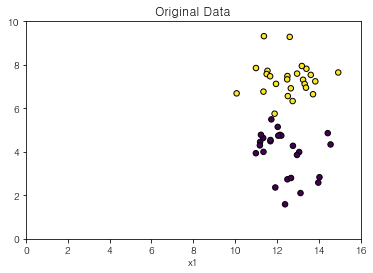

In [9]:
X, y = make_blobs(n_samples = 50, centers = 2, random_state = 4, cluster_std = 1)
X += 3

plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, edgecolors = 'black')
plt.xlim(0, 16)
plt.xlabel('x0')
plt.ylim(0, 10)
plt.xlabel('x1')
plt.title("Original Data")
plt.show();

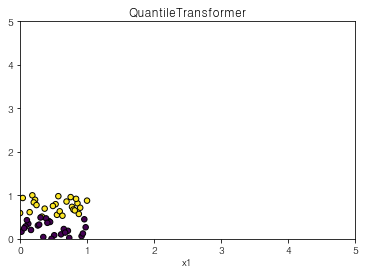

In [10]:
scaler = QuantileTransformer()
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c = y, s = 30, edgecolors = 'black')
plt.xlim(0, 5)
plt.xlabel('x0')
plt.ylim(0, 5)
plt.xlabel('x1')
plt.title(type(scaler).__name__)
plt.show();

랜덤하게 흩어져 있던 데이터 포인트들이 두 특성의 0과 1 사이에 고르게 분포되어 있습니다.

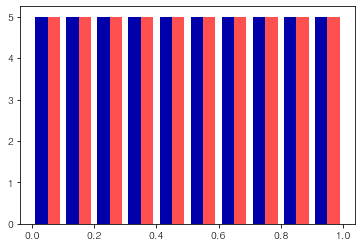

In [11]:
plt.hist(X_trans)
plt.show();

QuantileTransformer의 분위 수는 n_quantiles 매개변수에서 설정할 수 있으며 기본 값은 1,000입니다.

In [12]:
print(scaler.quantiles_.shape)

(1000, 2)


첫 번째, 1사분위, 중간값, 3사분위, 마지막 값을 지정

In [13]:
x = np.array([[0], [5], [8], [9], [10]])
print(np.percentile(x[:, 0], [0, 25, 50, 75, 100]))

[ 0.  5.  8.  9. 10.]


In [14]:
x_trans = QuantileTransformer().fit_transform(x)
print(np.percentile(x_trans[:, 0], [0, 25, 50, 75, 100]))

[0.   0.25 0.5  0.75 1.  ]


QuantileTransformer는 output_distribution 매개변수에서 normal로 지정하여 균등분포가 아닌 **정규분포**로 출력을 바꿀 수 있습니다.

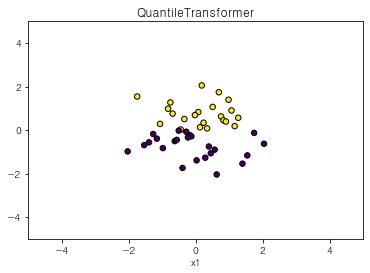

In [15]:
scaler = QuantileTransformer(output_distribution = 'normal')
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c = y, s = 30, edgecolors = 'black')
plt.xlim(-5, 5)
plt.xlabel('x0')
plt.ylim(-5, 5)
plt.xlabel('x1')
plt.title(type(scaler).__name__)
plt.show();

PowerTransformer은 method 매개변수에 'yeo-johnson'와 'box-cox' 알고리즘을 지정할 수 있고 기본값은 'yeo-johnson'입니다.

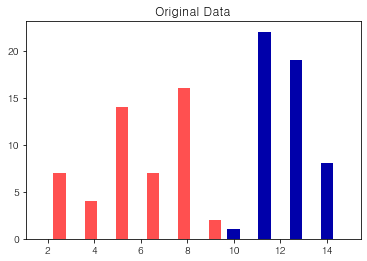

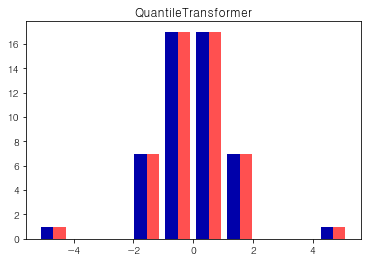

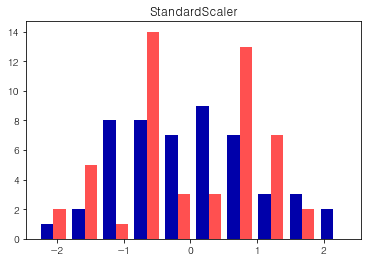

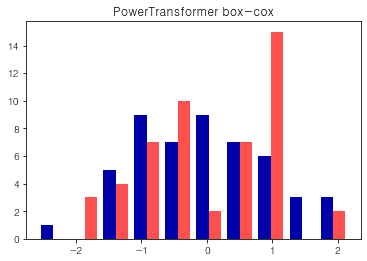

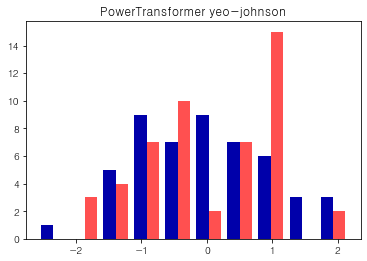

In [16]:
plt.hist(X)
plt.title('Original Data')
plt.show();

X_trans = QuantileTransformer(output_distribution = 'normal').fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show();

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show();

X_trans = PowerTransformer(method = 'box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show();

X_trans = PowerTransformer(method = 'yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show();

## 3.3.4 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기

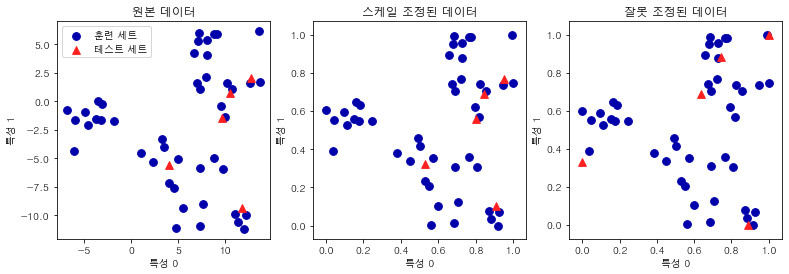

In [18]:
from sklearn.datasets import make_blobs
# 인위적인 dataset 생성
X, _ = make_blobs(n_samples = 50, centers = 5, random_state = 4, cluster_std = 2)

# 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test = train_test_split(X, random_state = 5, test_size = .1)

# 훈련 세트와 테스트 세트의 산점도를 그립니다.
fig, axes = plt.subplots(1, 3, figsize = (13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c = mglearn.cm2.colors[0], label = '훈련 세트', s = 60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker = '^', c = mglearn.cm2.colors[1], label = '테스트 세트', s = 60)
axes[0].legend(loc = 'upper left')
axes[0].set_title('원본 데이터')

# MinMaxScaler를 사용해 스케일을 조정합니다.
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다.
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c = mglearn.cm2.colors[0], label = '훈련 세트', s = 60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker = '^', c = mglearn.cm2.colors[1], label = '테스트 세트', s = 60)
axes[1].set_title('스케일 조정된 데이터')

# 테스트 세트의 스케일을 따로 조정합니다.
# 테스트 세트의 최솟값은 0, 최댓값은 1이 됩니다.
# 이는 예제를 위한 것으로 절대로 이렇게 사용해서는 안됩니다.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그립니다.
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c = mglearn.cm2.colors[0], label = '훈련 세트', s = 60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker = '^',
                c = mglearn.cm2.colors[1], label = '테스트 세트', s = 60)
axes[2].set_title('잘못 조정된 데이터')

for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")

1. 첫 번째 그래프는 2차원 원본 dataset  
2. 두 번째 그래프는 같은 데이터를 MinMaxScaler로 스케일을 조정한 것입니다. (첫 번째 그래프에서 축의 눈금만 바뀜)  
    - 테스트 데이터의 최솟값과 최댓값은 0과 1이 아닙니다.
3. 세 번째 그래프는 훈련 세트와 테스트 세트의 스케일을 서로 다른 방식으로 조정
    - 테스트 데이터의 최솟갑과 최댓값이 모두 0과 1입니다.
    - 테스트 포인트는 스케일이 다르게 조정되었기 때문에 훈련 세트와 다른 비율로 이동했습니다.

#### 단축 메서드와 효율적인 방법

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 메소드 체이닝(chaining)을 사용하여 fit과 transform을 연달아 호출합니다.
X_scaled = scaler.fit(X_train).transform(X_train)

# 위와 동일하지만 더 효과적입니다.
X_scaled_d = scaler.fit_transform(X_train)

fit_transform이 모든 모델에서 효율이 좋은 것은 아니지만, 훈련 세트 변환에 이 메서드를 사용하는 것은 좋은 습관입니다.

## 3.3.5 지도 학습에서 데이터 전처리 효과

In [20]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

svm = SVC(C = 100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도 : {:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도 : 0.63


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [21]:
# 0~1 사이로 스케일 조정
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("스케일 조정된 테스트 세트의 정확도 : {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도 : 0.97


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [22]:
# 평균 0, 분산 1을 갖도록 스케일 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("SVM 테스트 정확도 : {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM 테스트 정확도 : 0.96
